In [1]:
# import the necessary packages
import argparse
import cv2
#import pyopencv 
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import re

In [2]:
import zipfile
import io
from io import BytesIO

import matplotlib.image as mpimg
import types
import pandas as pd

streaming_body_1 = '541CANONdrin.zip'
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 

zip_ref=zipfile.ZipFile(streaming_body_1,'r')


In [3]:
# loading image zip file into array

#width = 22
#height = 32

val_image=[]
image_names=[]
image_names=np.array(zip_ref.namelist())
#print (image_names)
x_images_list=[]
y_images_list=[]
for img in zip_ref.namelist():
    img2 = Image.open(zip_ref.open(img))
   # img3 = img2.resize((width, height), Image.BILINEAR)
    img4 = np.asarray(img2)
    x_images_list.append(img4)
#    y_images_list.append(int(img[0]))

x_images = np.array(x_images_list)
#y_images = np.array(y_images_list)
x_images = np.transpose(x_images, (1,2,3, 0))
#print (y_images)
#print (x_images[1])

In [4]:
np.set_printoptions(linewidth=180)

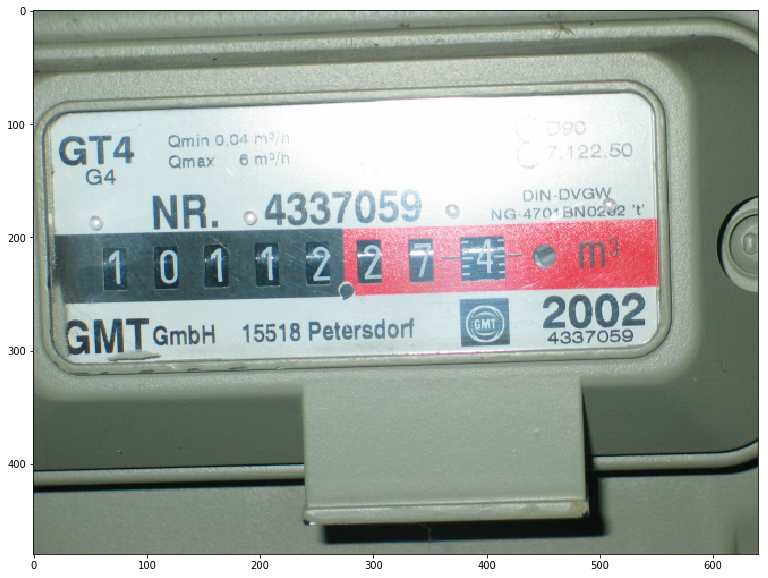

In [5]:
for ind in range(1):
    plt.figure(figsize=(20,10))
    plt.imshow(x_images[:,:,:,ind])
    plt.show()

In [11]:
!pip install opencv-python

    100% |████████████████████████████████| 25.4MB 926kB/s eta 0:00:01    84% |███████████████████████████     | 21.5MB 55.8MB/s eta 0:00:01
notebook 5.0.0 requires nbconvert, which is not installed.
ipywidgets 6.0.0 requires widgetsnbextension~=2.0.0, which is not installed.
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [6]:

# initialize the list of reference points and boolean indicating
# whether cropping is being performed or not
refPt = []
cropping = False
 
def click_and_crop(event, x, y, flags, param):
    # grab references to the global variables
    global refPt, cropping
 
    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being
    # performed
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
        cropping = True
 
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        refPt.append((x, y))
        cropping = False
 
        # draw a rectangle around the region of interest
        cv2.rectangle(img, refPt[0], refPt[1], (0, 255, 0), 2)
        cv2.imshow("Bild", img)

In [7]:
%matplotlib inline 

In [8]:
# pcvimg = cv2.Mat(x_images[:,:,:,1])
img = np.zeros((512,512,3), np.uint8)


In [ ]:
#image = cv2.imread(img,-1)
img = x_images[:,:,:,3]
clone = img.copy()
cv2.namedWindow("Bild")
cv2.setMouseCallback("Bild", click_and_crop)

# keep looping until the 'q' key is pressed
while True:
    # display the image and wait for a keypress
    cv2.imshow('Bild',img)
    #cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # if the 'r' key is pressed, reset the cropping region
    if key == ord("r"):
        img = clone.copy()

    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break

# if there are two reference points, then crop the region of interest
# from teh image and display it
if len(refPt) == 2:
    print (refPt)
    roi = clone[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]
    cv2.imshow("ROI", roi)
    cv2.waitKey(0)

#cv2.imshow('Bild',img)
#cv2.waitKey(0)



cv2.destroyAllWindows()

Bilder einlesen
zähler rausschneiden
in 7 teile zerlegen


In [ ]:
print (refPt)

In [35]:
#f = open("zaehlerdaten.txt", "r")
f= io.open("zaehlerdaten.txt", mode="r", encoding="utf-8-sig")
#print(f.read())
#lines = f.readlines()
#lines3= f.read().splitlines()
lines2 =f.read().rstrip()
print (lines)
print (len(lines))
print (type(lines))
print (lines2)
print (len(lines2))
print (type(lines2))
print (lines3)
print (len(lines3))
print (type(lines3))
nlines = np.asarray(lines)
nlines2 = np.asarray(lines2)
nlines3 = np.asarray(lines3)

['1011227\n', '1011241\n', '1011245\n', '1011258\n', '1011265\n', '1011265\n', '1011265\n', '1011265\n', '1011269\n', '1011269\n', '1011269\n', '1011269\n', '1011272\n', '1011272\n', '1011272\n', '1011272\n', '1011276\n', '1011309\n', '1011331\n', '1011342\n', '1011357\n', '1011367\n', '1011377\n', '1011387\n', '1011400\n', '1011411\n', '1011424\n', '1011433\n', '1011446\n', '1011460\n', '1011470\n', '1011480\n', '1011490\n', '1011495\n', '1011505\n', '1011516\n', '1011522\n', '1011532\n', '1011543\n', '1011559\n', '1011567\n', '1011575\n', '1011585\n', '1011590\n', '1011605\n', '1011613\n', '1011619\n', '1011623\n', '1011634\n', '1011648\n', '1011653\n', '1011665\n', '1011672\n', '1011672\n', '1011672\n', '1011672\n', '1011672\n', '1011676\n', '1011676\n', '1011676\n', '1011676\n', '1011676\n', '1011676\n', '1011680\n', '1011685\n', '1011715\n', '1011734\n', '1011746\n', '1011757\n', '1011769\n', '1011775\n', '1011785\n', '1011798\n', '1011807\n', '1011818\n', '1011825\n', '1011835\n'

(480, 640, 3, 100)


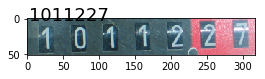

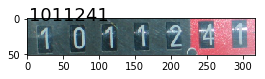

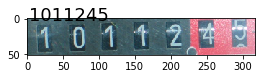

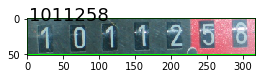

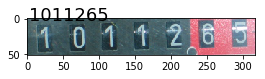

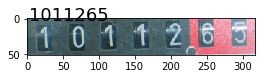

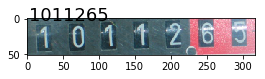

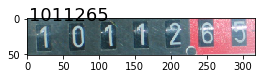

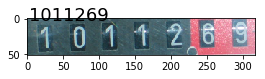

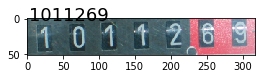

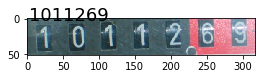

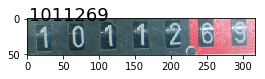

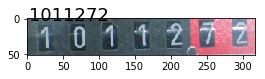

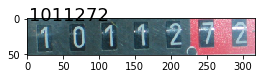

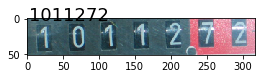

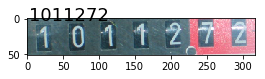

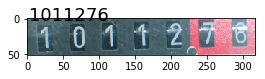

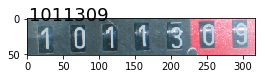

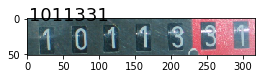

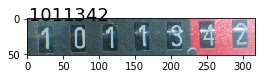

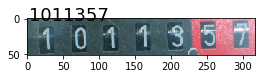

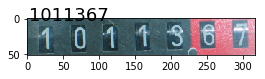

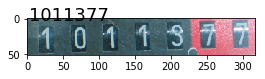

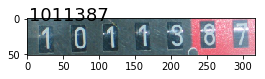

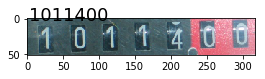

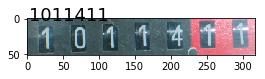

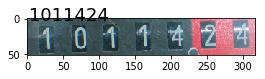

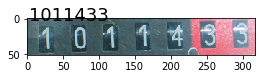

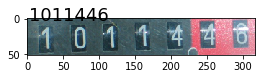

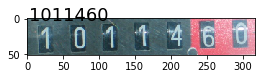

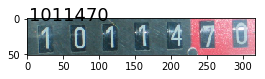

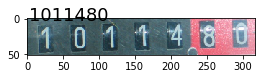

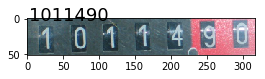

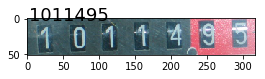

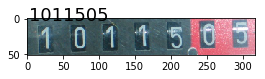

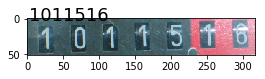

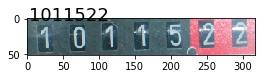

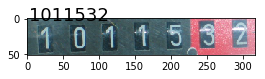

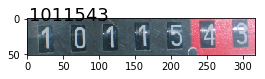

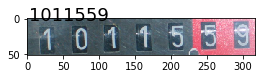

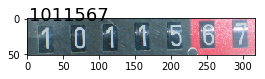

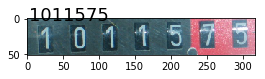

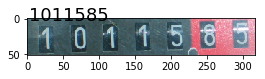

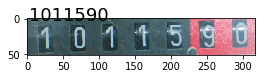

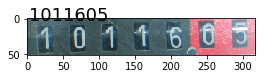

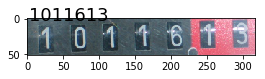

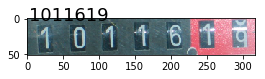

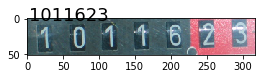

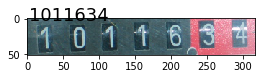

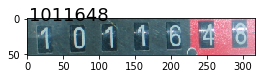

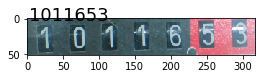

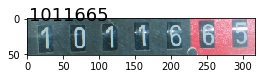

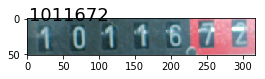

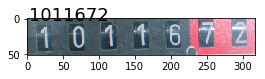

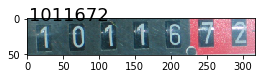

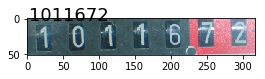

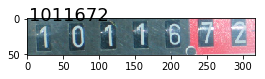

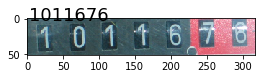

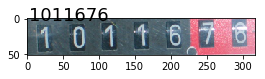

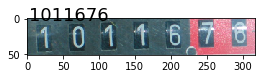

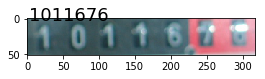

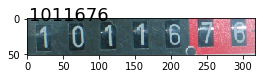

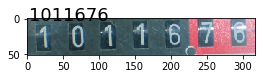

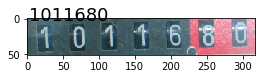

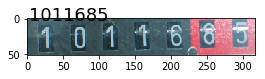

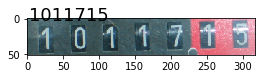

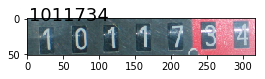

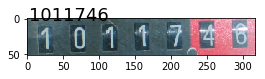

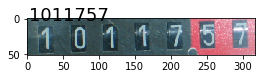

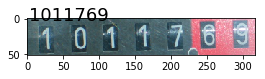

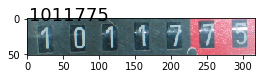

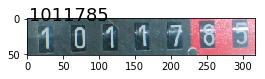

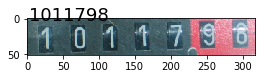

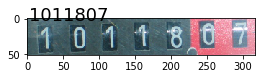

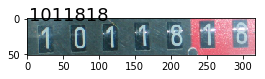

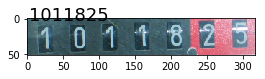

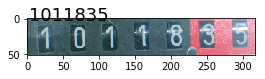

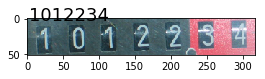

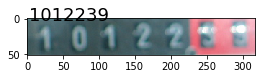

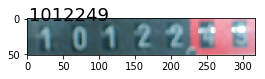

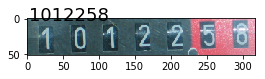

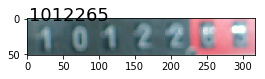

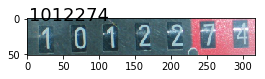

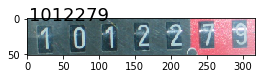

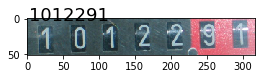

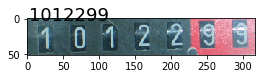

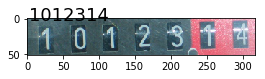

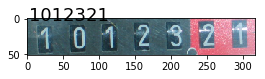

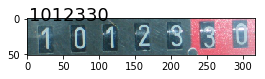

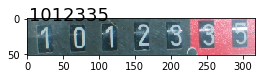

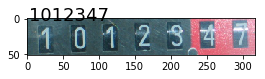

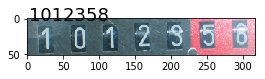

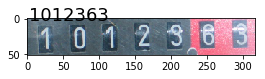

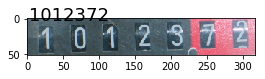

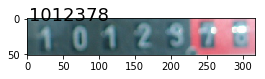

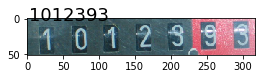

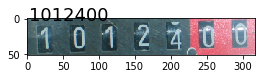

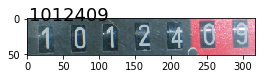

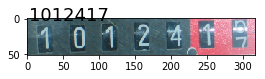

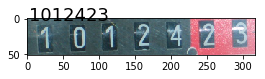

In [73]:
anz = len(x_images[:,:,:,])
print (x_images.shape)
for ind in range(100):
   # plt.figure(figsize=(20,10))
    fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
    neu = x_images[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0],:,ind]
    #plt.imshow(x_images[:,:,:,ind])
    plt.subplot(221)
    plt.imshow(neu)
    #plt.subplot(212)
    plt.text(3,3,nlines3[ind], fontsize=18)
    plt.show()
    
    

    

In [110]:
print (refPt)
anfang =refPt[0][0]
print (anfang)
ende = refPt[1][0]
siebentel_breite = abs(refPt[0][0]-refPt[1][0])/7.0
print (siebentel_breite)
individual_numbers=[]
for meter_reading in range(100):
    for ind in range(7):
        siebentel = x_images[refPt[0][1]+6:refPt[1][1]-8, \
#                         int(anfang+siebentel_breite*(ind)+12):int(anfang+siebentel_breite*(ind+1)-8),:,0]
                             int(anfang+siebentel_breite*(ind)+12):int(anfang++siebentel_breite*(ind)+38),:,meter_reading]
        #plt.imshow(siebentel)
        #plt.show()
        numb = np.asarray(siebentel)
        individual_numbers.append(numb)
        #print (siebentel.shape)
print (numb.shape)
numbers=np.array(individual_numbers)
print (numbers.shape)

[(46, 199), (364, 250)]
46
45.42857142857143
(37, 26, 3)
(700, 37, 26, 3)


In [111]:
import pickle
import copy 
numbersbackup = copy.deepcopy(numbers)
pickle.dump(numbersbackup, open('numbers.pck','wb'))

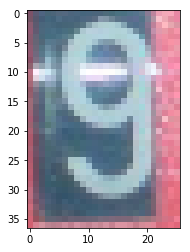

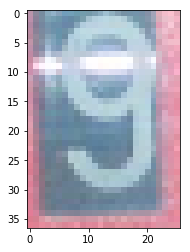

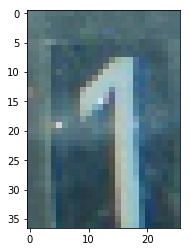

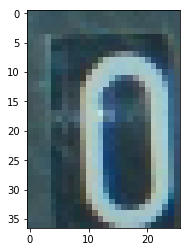

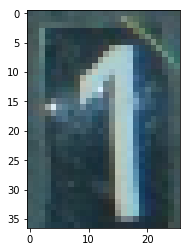

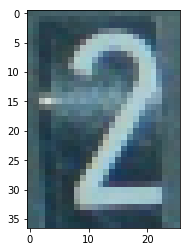

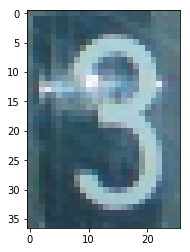

In [114]:
for ind in range(7):
    plt.imshow(numbers[600+ind])
    plt.show()

In [43]:
ndigits =[]
for ind in range(len(nlines3)):
    zahl = list(nlines3[ind])
    zahl2 = [w for w in zahl if re.search('^[0-9]$', w)]
    ndigits.append(zahl2)
#ndigits = [w for w in ndigits if re.search('[0-9]', w)]
ndigits_array = np.asarray(ndigits)
ndigits_array_flat = ndigits_array.reshape(700)
print (ndigits_array_flat.shape)
print (ndigits_array_flat)
#print (type (ndigits[0]))

(700,)
['1' '0' '1' '1' '2' '2' '7' '1' '0' '1' '1' '2' '4' '1' '1' '0' '1' '1'
 '2' '4' '5' '1' '0' '1' '1' '2' '5' '8' '1' '0' '1' '1' '2' '6' '5' '1'
 '0' '1' '1' '2' '6' '5' '1' '0' '1' '1' '2' '6' '5' '1' '0' '1' '1' '2'
 '6' '5' '1' '0' '1' '1' '2' '6' '9' '1' '0' '1' '1' '2' '6' '9' '1' '0'
 '1' '1' '2' '6' '9' '1' '0' '1' '1' '2' '6' '9' '1' '0' '1' '1' '2' '7'
 '2' '1' '0' '1' '1' '2' '7' '2' '1' '0' '1' '1' '2' '7' '2' '1' '0' '1'
 '1' '2' '7' '2' '1' '0' '1' '1' '2' '7' '6' '1' '0' '1' '1' '3' '0' '9'
 '1' '0' '1' '1' '3' '3' '1' '1' '0' '1' '1' '3' '4' '2' '1' '0' '1' '1'
 '3' '5' '7' '1' '0' '1' '1' '3' '6' '7' '1' '0' '1' '1' '3' '7' '7' '1'
 '0' '1' '1' '3' '8' '7' '1' '0' '1' '1' '4' '0' '0' '1' '0' '1' '1' '4'
 '1' '1' '1' '0' '1' '1' '4' '2' '4' '1' '0' '1' '1' '4' '3' '3' '1' '0'
 '1' '1' '4' '4' '6' '1' '0' '1' '1' '4' '6' '0' '1' '0' '1' '1' '4' '7'
 '0' '1' '0' '1' '1' '4' '8' '0' '1' '0' '1' '1' '4' '9' '0' '1' '0' '1'
 '1' '4' '9' '5' '1' '0' '1' '1' '5' '0' '5'

In [45]:
import pickle
import copy 
digitsbackup = copy.deepcopy(ndigits_array_flat)
pickle.dump(digitsbackup, open('digits.pck','wb'))